<a href="https://colab.research.google.com/github/Ashish-1521/ML-HW/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For classifying data first we need to process or clean the data from impurities that restrict accuracy of the model this phase of cleaning is pre-processing of data.
In the data I have removed all the null values and ignored the data that does not provide information or help in classifying for example the Name column while filling the missing information for columns like AGE which provide important information.
I have filled the missing information using the interpolate function which fills the missing values with median values, these missing values can be filled with the mean of all the values in that column.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# reading the file
_data = pd.read_csv("/content/sample_data/train.csv")

# Removing unwanted or columns that provide much info
unwanted_Col = ["Name","Cabin","Ticket"]
_data = _data.drop(unwanted_Col,axis=1)

# Removing NA/null values from columns
_data = _data.dropna()

# Tranforming sex, Embark and Pclass to columns for more information and detailing
new_col = ["Pclass","Sex","Embarked"]
new_data = []
# get_dummies converts the values of column to a set of columns or class of different values.
for c in new_col:
  new_data.append(pd.get_dummies(_data[c]))
new_data = pd.concat(new_data,axis=1) # since the data is in list format we concat the data with a null values for easy conversion
_data = pd.concat((_data,new_data),axis=1)

# Dropping redundant and unwanted columns
unwanted_col = ["Pclass","Sex","Embarked","Parch","SibSp"]
_data = _data.drop(unwanted_col,axis=1)

# Use interpolate function to fill all the missing values in the age. Interpolate fills the missing values with the median value
_data["Age"] = _data["Age"].interpolate()
print(_data)

     PassengerId  Survived   Age     Fare  1  2  3  female  male  C  Q  S
0              1         0  22.0   7.2500  0  0  1       0     1  0  0  1
1              2         1  38.0  71.2833  1  0  0       1     0  1  0  0
2              3         1  26.0   7.9250  0  0  1       1     0  0  0  1
3              4         1  35.0  53.1000  1  0  0       1     0  0  0  1
4              5         0  35.0   8.0500  0  0  1       0     1  0  0  1
..           ...       ...   ...      ... .. .. ..     ...   ... .. .. ..
885          886         0  39.0  29.1250  0  0  1       1     0  0  1  0
886          887         0  27.0  13.0000  0  1  0       0     1  0  0  1
887          888         1  19.0  30.0000  1  0  0       1     0  0  0  1
889          890         1  26.0  30.0000  1  0  0       0     1  1  0  0
890          891         0  32.0   7.7500  0  0  1       0     1  0  1  0

[712 rows x 12 columns]


I have used the decisiontreeclassifier for tree classification and split the data into 2 halves in which 30% is test data and the remaining 70% is split data. Also classified the data into survived and not survived for detailing.

Accuracy : 0.780373831775701


[Text(0.5, 0.875, 'x[6] <= 0.5\ngini = 0.481\nsamples = 498\nvalue = [297, 201]\nclass = Survived'),
 Text(0.25, 0.625, 'x[3] <= 0.5\ngini = 0.325\nsamples = 323\nvalue = [257, 66]\nclass = Survived'),
 Text(0.125, 0.375, 'x[1] <= 8.5\ngini = 0.246\nsamples = 251\nvalue = [215, 36]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.457\nsamples = 17\nvalue = [6, 11]\nclass = Not Survived'),
 Text(0.1875, 0.125, 'gini = 0.191\nsamples = 234\nvalue = [209, 25]\nclass = Survived'),
 Text(0.375, 0.375, 'x[0] <= 384.5\ngini = 0.486\nsamples = 72\nvalue = [42, 30]\nclass = Survived'),
 Text(0.3125, 0.125, 'gini = 0.346\nsamples = 27\nvalue = [21, 6]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 45\nvalue = [21, 24]\nclass = Not Survived'),
 Text(0.75, 0.625, 'x[5] <= 0.5\ngini = 0.353\nsamples = 175\nvalue = [40, 135]\nclass = Not Survived'),
 Text(0.625, 0.375, 'x[0] <= 854.5\ngini = 0.075\nsamples = 103\nvalue = [4, 99]\nclass = Not Survived'),
 Text(0.5625, 0.125, 'g

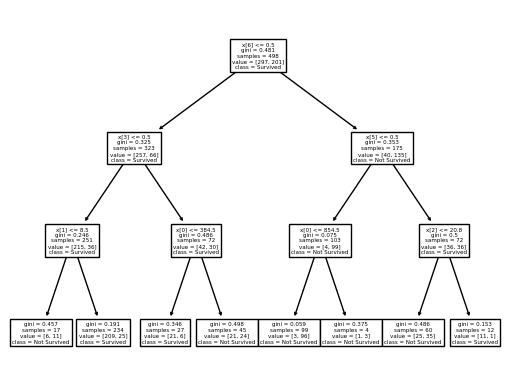

In [3]:
from sklearn.metrics import accuracy_score
X = _data.values
Y = _data["Survived"].values

# X still has survived column values removing the column
X = np.delete(X,1,axis=1)

X_train, X_test, Y_train, Y_real = train_test_split(X,Y,test_size=0.3)

# Using Decision tree classifier for decision tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,Y_train)
# print(clf.score)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_real,y_pred)
print("Accuracy :",accuracy)
tree.plot_tree(clf,class_names = ['Survived','Not Survived'])

I have used the ShuffleSplit function from Scikit Learn for the cross validation process. In shuffle split the data is replaced for test and training in each and every iteration and used the mean for average accuracy


In [4]:
# For 5 fold cross validation we divide the dataset into 5 parts and each time we choose the 4 parts as training set and the remaining as testset
cv = ShuffleSplit(n_splits=5, test_size=0.3)
cross_Validation_scores = cross_val_score(clf,X_train,Y_train,cv=cv)
print(cross_Validation_scores.mean())


0.7773333333333333


For RandomForest, Bagging, Adaboost I used the functions from Scikit Learn and trained them with training data provided from train_test_split function and later on predicted/classified the test data and the found the accuracy using score method.

In [5]:
model_rf = RandomForestClassifier()
model_rf = clf.fit(X_train,Y_train)
y_pred_forest = model_rf.predict(X_test)
y_pred_forest
accuracy_forest = model_rf.score(X_test,Y_real)
accuracy_forest

0.780373831775701

In [6]:
from sklearn.ensemble import BaggingClassifier
classification_1 = tree.DecisionTreeClassifier(max_depth=3)
bagging_classifier = BaggingClassifier(estimator=classification_1,n_estimators=100,random_state=1)
bagging_classifier.fit(X_train,Y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy_score(Y_real, y_pred)

0.8271028037383178

In [7]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100)
adaBoost.fit(X_train,Y_train)
y_pred = adaBoost.predict(X_test)
accuracy_score(Y_real, y_pred)

0.7990654205607477